<a href="https://colab.research.google.com/github/alirempel/cap-comp215/blob/main/final_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 Final Exam Part II   Spring 2024
**Please add you name below...**
* Name: Alison Rempel
* Date:  Apr. 13, 2024


## Instructions:
 - this portion of the exam is open-book, open-internet, but must be completed individually (no communications, co-operations, or assistance from another human being!)
 - complete the exercises in this notebook
 - for each exercise, write a piece of code that solves the problem and produces some output, as specified.
 - any code taken from another source (e.g. stackoverflow, ChatGPT) MUST be clearly documented with a reference to the website URL or the prompt given to ChatGPT.

### Topics:
 - Data structures:  list, class, 2D array
 - Algorithms: matrix operators (numpy), sliding dot-product (correlation)
 - Techniques: list comprehension, generators, random numbers, plotting
 - Concepts: Computational Experiment

As usual, we start with module imports...

In [1]:
%matplotlib inline

import math, random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d


## Our regular Helper Functions for plotting data

In [2]:
def plot_2d_array(array, axes=None, title='', cmap=matplotlib.colormaps['tab20'], **options):
    """
    Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    # Turn off axes labels and tick marks
    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False ,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

## Logging Model
The 2D CA model below simulates a very simplistic pattern of forest logging over time.
The rules are: forests grow until the average "maturity" over a 5x5 square "cut block" exceeds some threshold, then the whole "cut block" is logged.
Forests re-grow at different rates on different sites, reflecting variability in site conditions.

In [3]:
MATURE = 50  # "maturity" level at which a forest is considered ready-to-log


class Logging:
    """ 2D CA that simulates simple logging in large square cut blocks  """
    kernel = np.array([[1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1]])

    def __init__(self, n, growth_rate_range=(0.1, 2), log_at=MATURE, initial_maturity=None):
        """
        n: size of forest state array is n x n
        growth_rate_range: each forest cell "grows" at a random rate within this range,
                         representing varying site conditions.
                         a growth rate of 1 means forest "grows" at 1 "maturity" unit per time step
        log_at:  "cut blocks" are logged when they reach this "maturity" level
        initial_maturity: a 2-tuple defining (min, max) maturity - default:(0,log_at)
                          forest is initialized with random "maturity" value in this range.
        """
        initial_maturity = initial_maturity or (0, log_at)
        self.state = np.array(np.random.randint(*initial_maturity, size=(n, n)), dtype='float64')
        low, high = growth_rate_range
        self.site_conditions = low + np.random.random(size=(n, n)) * (high-low)
        self.maturity = log_at
        self.harvested = []  #  bookkeeping: track number of cells harvested in each timestep

    def step(self):
        """Executes one time step, applying the CA rules to grow and log forest cut blocks."""
        # log entire neighbourhood around cells where average maturity is "loggable"
        avg_maturity = correlate2d(self.state, self.kernel, mode='same', boundary='wrap') / self.kernel.size
        loggable = avg_maturity >= self.maturity
        log_it = correlate2d(loggable, self.kernel, mode='same', boundary='wrap') > 0
        grow_it = np.logical_not(log_it)  # not log_it
        # state transitions
        self.harvested.append(np.sum(log_it))
        self.state[log_it] = 0
        self.state[grow_it] += self.site_conditions[grow_it]

    def matured(self):
        """ Return the proportion of forest that has re-grown to at least MATURE """
        return np.sum(self.state >= MATURE) / self.state.size

    def draw(self, axes=None, title=None):
        """Draws the forest - young forest is light green, getting darker as it ages. """
        title = f"{title}: {round(self.matured() * 100, 2)}% mature forest"
        plot_2d_array(self.state, axes=axes, title=title, cmap='Greens_r', vmin=0, vmax=MATURE)

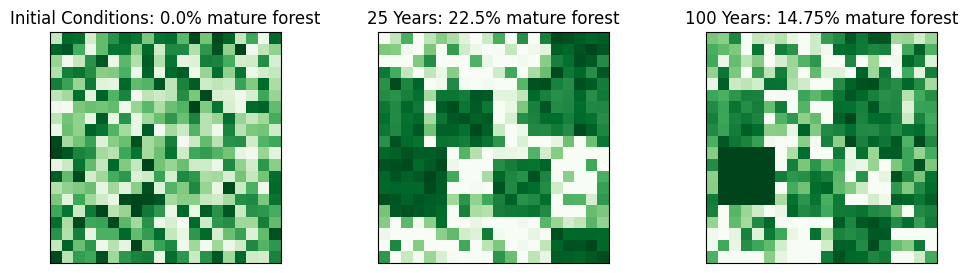

In [4]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

model = Logging(n=20)
model.draw(ax[0], title="Initial Conditions" )
for _ in range(25):
    model.step()
model.draw(ax[1], title="25 Years" )
for _ in range(75):
    model.step()
model.draw(ax[2], title="100 Years" )

plt.show()

## Exam Questions
For each question, supply a piece of code and/or a written answer, as required.

For these questions, there is no single "correct" solution. Rather you code and/or answer should illustrate the correct concept or how to achieve the desired goal.  There are many "correct" ways to answer each question - use your judgement to provide a good solution.

### Q.1  Time Series plot (5 points)
Plot the proportion of mature forest over a timeframe long enough to achieve a stable pattern.

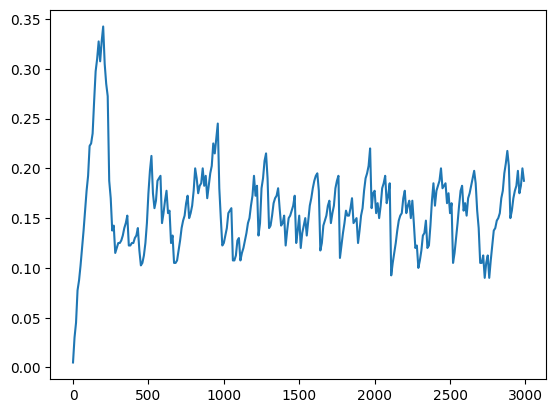

In [11]:
# Solution for Q.1 here

model = Logging(n=20)
time_frame = range(0,3000,10)
matured_props = []

for time in time_frame:
  model.step()
  matured_props.append(model.matured())

plt.plot(time_frame,matured_props)
plt.show()

### Q.2  Steady-state analysis (3 points)
Concise answers please!  point form is fine.
i) What is the system "steady state" with the model parameters you used to generate the plot above?
ii) Does the system reach a static equilibrium, or is it better described as oscillating?
iii) How would you explain the shape of the plot above in terms of the model behaviour?

### Answer Q.2 here
i) I used the default parameters and n=20, and the steady state oscillates between 10% and 25% mature trees.

ii) Oscillating

iii) Few logs are mature at the start, then as they grow a lot become mature at the same time and get cut. Eventually the different grow rates stagger the times the trees get mature.

### Q. 3  Weighted Average (5 points)
One problem with this model is it computes the "average maturity" for each cell as a straight average of its 25 cell neighbourhood.  But cells at a further distance should contribute less "weight" to the "maturity" rating of the neighbourhood.
Provide a modified kernel (+ any additional changes) that would implement this "distance weighted average maturity" for each cell, where the maturity of cells closer to the centre contribute more to the average than those further away.

**Note**:  you may copy-paste the whole model class if you like, or just supply the bits of code you would modify.  

In [ ]:
# Solution for Q.3 here
kernel = np.array([[0.10, 0.20, 0.25, 0.20, 0.10],
                    [0.20, 0.25, 0.50, 0.25, 0.20],
                    [0.25, 0.50, 1.00, 0.50, 0.25],
                    [0.20, 0.25, 0.50, 0.25, 0.20],
                    [0.10, 0.20, 0.25, 0.20, 0.10]])

avg_maturity = correlate2d(self.state, self.kernel, mode='same', boundary='wrap') / sum(self.kernel)

### Q.4 Experiment (7 points)
Develop and conduct a computational experiment to show how **growth rate** affects the amount of forest **harvested**.
Your experiment should run the model for various `growth_rate_range` values and measure the amount of forest `harvested`.
Your solution must include:
i) at least one plot showing the experimental results; and
ii) an analysis of the conclusions you can draw from this experiment.
    Was this is an expected or unexpected result?

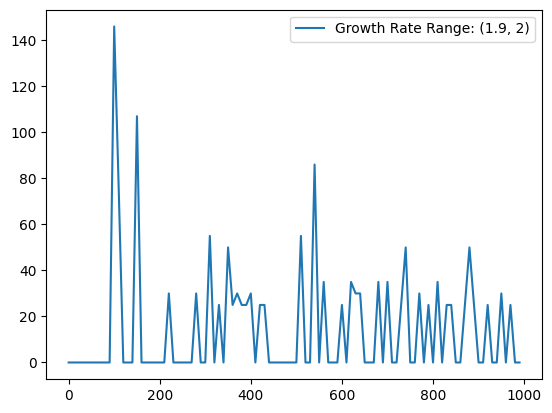

In [32]:
# Solution for Q.4 here

growth_rate_ranges = ((0.1,2),(1,1.1),(0.1,0.5),(1.9,2))
time_frame = range(0,1000,10)
show_on_plot = growth_rate_ranges[3]

for growth_rate in growth_rate_ranges:
  model = Logging(n=20,growth_rate_range=growth_rate)
  for time in time_frame:
    model.step()
  if growth_rate in show_on_plot or growth_rate == show_on_plot:
    plt.plot(time_frame,model.harvested,label = f"Growth Rate Range: {growth_rate}")

p
plt.legend()
plt.show()

### Q.4 Your Analysis and Conclusions
